In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
creditcard = pd.read_csv("./datasets/creditcard/dataset.csv")

In [3]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: >

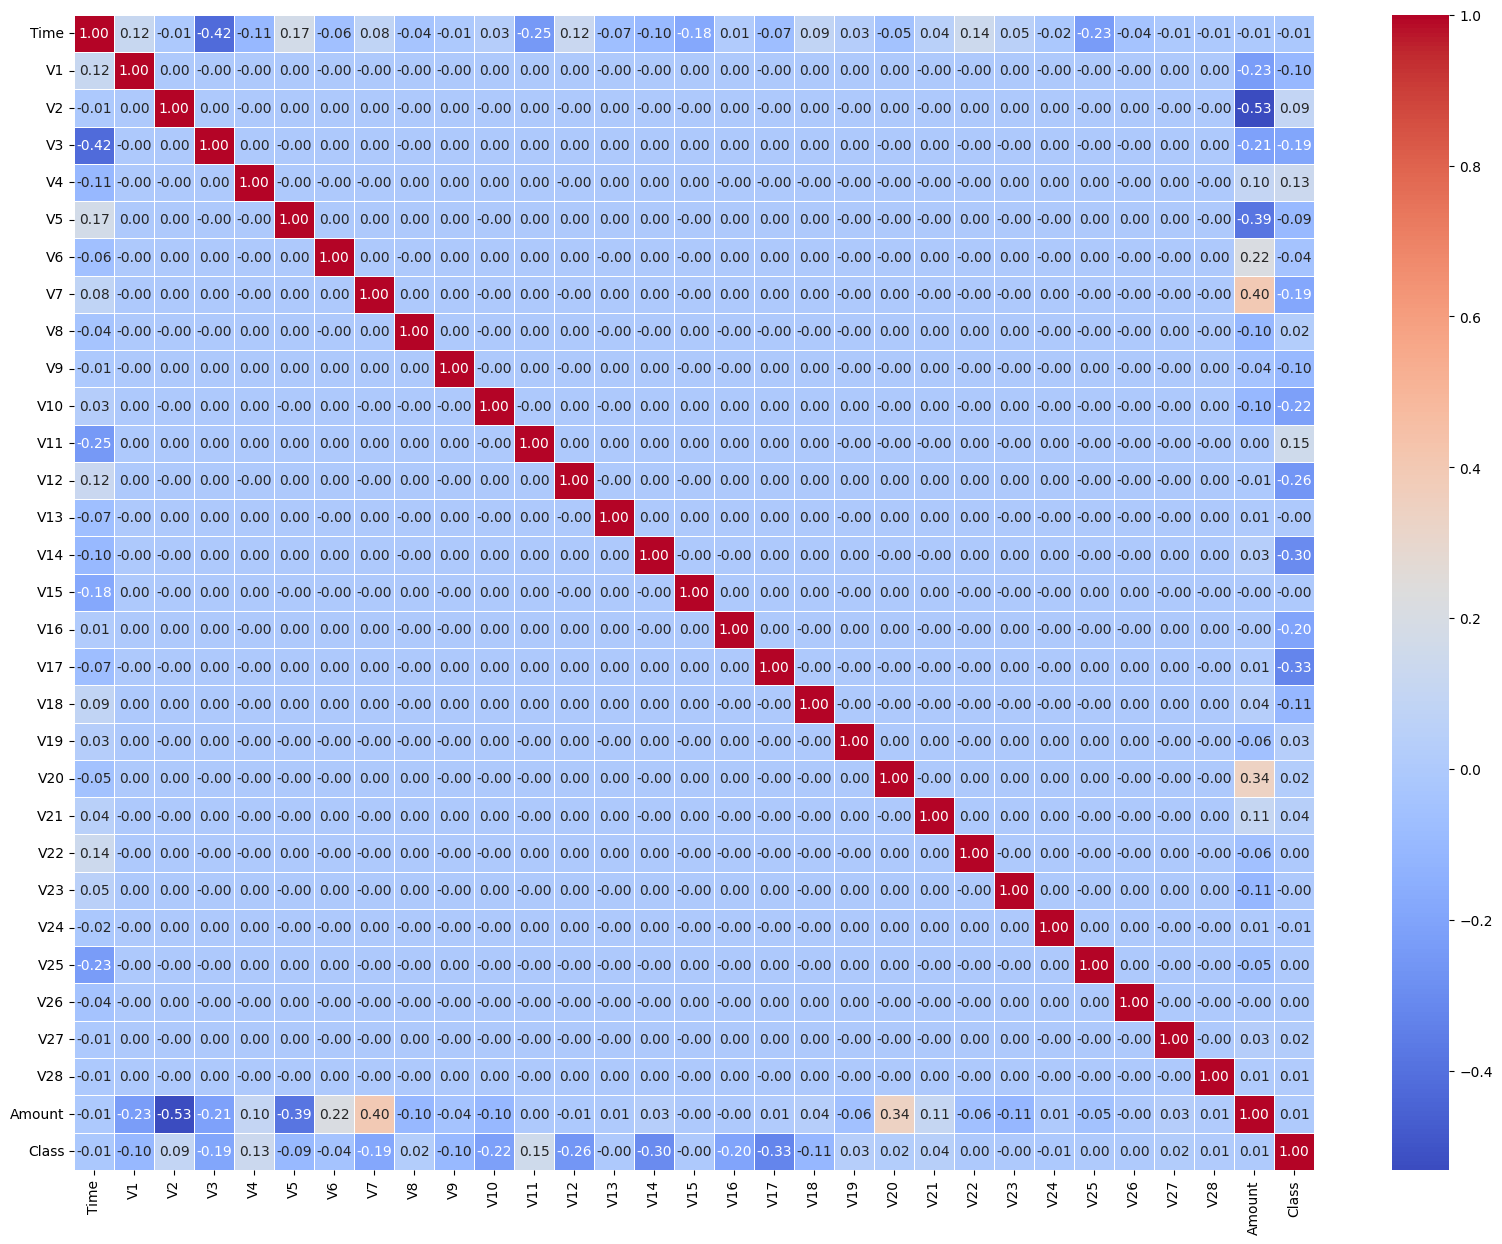

In [4]:
plt.figure(figsize=(20, 15))
sns.heatmap(
    data=creditcard.corr(numeric_only=True),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
)

In [5]:
from sklearn.model_selection import train_test_split

X = creditcard.drop("Class", axis=1)
y = creditcard["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

<Axes: xlabel='Class', ylabel='Count'>

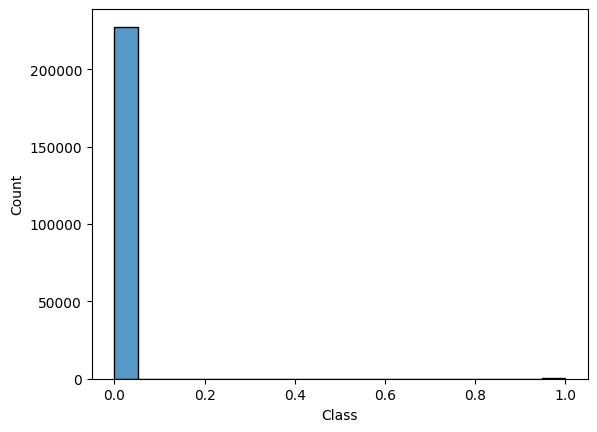

In [6]:
sns.histplot(data=y_train)

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the ROC AUC score
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.74      0.75        98

    accuracy                           1.00     56962
   macro avg       0.88      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56840    24]
 [   25    73]]
ROC AUC Score: 0.8722379497662881


In [9]:
from imblearn.over_sampling import SMOTE

## Smote based Oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)  # type: ignore

<Axes: xlabel='Class', ylabel='Count'>

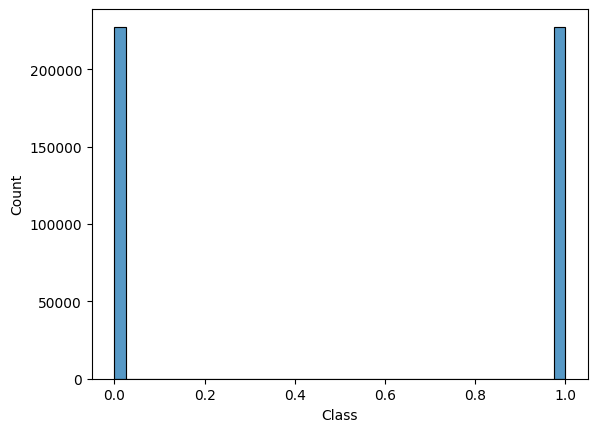

In [10]:
sns.histplot(data=y_train_resampled)  # type: ignore

In [11]:
# Initialize and train the classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the ROC AUC score
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.42      0.80      0.55        98

    accuracy                           1.00     56962
   macro avg       0.71      0.90      0.78     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56758   106]
 [   20    78]]
ROC AUC Score: 0.897027135277296
